# Échantillonneur de Gibbs

On applique l'échantillonneur de Gibbs dans un cas très simple de vecteurs gaussiens en dimension 2.

Rappel : pour  générer des échantillons $\mathbf x^j$ d'une loi $p(x_1, x_2, \ldots, x_N)$, on itère des échantillonnages d'une variable, en laissant les autres constantes :
* On choisit un indice $n$, aléatoirement ou de façon déterministe,
* on génère un échantillon en recopiant les coefficients d'indices différents de $n$ ($x^{j+1}_k = x^j_k$), pour $k \neq n$), et en tirant une nouvelle valeur $x^{j+1}_n$ suivant la loi conditionnelle $p(x_n | x_1  =x_1^j, \ldots, x_{n-1}=x_{n-1}^j,x_{n+1}=x_{n+1}^j, \ldots, x_N=x_{N}^j)$.

Si c'est possible, on peut grouper des paramètres par blocs.

On étudiera (de façon empirique) la convergence pour deux exemples de lois normales.

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

On considère deux vecteurs aléatoires gaussiens $Y=(y_1, y_2)$ et $Z=(z_1, z_2)$ centrées, de moyennes nulles et de matrices de covariances respectives
$$
C_Y = 
\left(
\begin{array}{cc}
1 & 0 \\
0 & 9
\end{array}
\right)
,\ \ \ 
C_Z = 
\left(
\begin{array}{cc}
5 & 4 \\
4 & 5
\end{array}
\right).
$$

In [2]:
CX = np.array([[1,0],[0,9]])
CY = np.array([[5,4],[4, 5]])

**Question 1** : Écrire les lois conditionnelles $p(y_1 | y_2)$, $p(y_2 | y_1)$, $p(z_1 | z_2)$ et $p(z_2 | z_1)$, et implémenter l'échantillonneur de Gibbs pour $Y$ et $Z$.

In [13]:
def gibbsY(L): 
    Ysamples = np.zeros([2, L])
    for i in range(1, L):
        index = rand.binomial(1, 0.5)
        Ysamples[index, i] = rand.normal(0, np.sqrt(CX[index, index]))
        Ysamples[1-index, i] = Ysamples[1-index, i- 1]
    return Ysamples

In [14]:
def gibbsZ(L):

    Zsamples = np.zeros([2, L])
    for i in range(1, L):
        index = rand.binomial(1, 0.5)
        Zsamples[index, i] = rand.normal(4  * Zsamples[1 - index, i - 1]/ 5, np.sqrt(9/5))
        Zsamples[1-index, i] = Zsamples[1-index, i- 1]    
    
    return Zsamples

**Question 2** : vérifier en calculant moyenne et matrice de covariance empiriques à partir de $L = 10000$ échantillons.

In [22]:
Y, Z = gibbsY(10_000), gibbsZ(10_000)

print(f"La moyenne du vecteur Y est {np.mean(Y, axis = 1)}")
print(f"La moyenne du vecteur Z est {np.mean(Z, axis = 1)}")
print()
pprint(f"La covariance de Y est {np.cov(Y)}")
pprint(f"La covariance de Z est {np.cov(Z)}")

La moyenne du vecteur Y est [-0.00261787  0.01995607]
La moyenne du vecteur Z est [0.05616685 0.08761252]

'La covariance de Y est [[ 1.00087361 -0.03747079]\n [-0.03747079  9.08021129]]'
'La covariance de Z est [[5.22765103 4.2490088 ]\n [4.2490088  5.28757242]]'


**Question 3** : tracer une trajectoire des échantillons de $Y$, puis de $Z$ et comparer ($L = 200$).

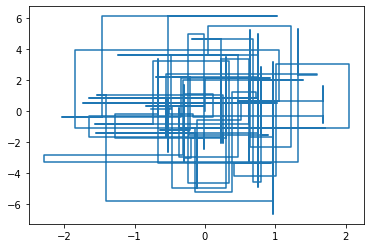

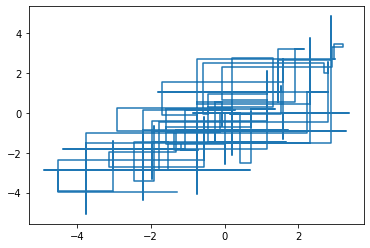

In [15]:
L = 200


Y, Z = gibbsY(200), gibbsZ(200)

plt.plot(Y[0], Y[1])
plt.show()
plt.plot(Z[0], Z[1])
plt.show()


**Question 3** : on s'intéresse à l'estimation de la moyenne de $Y$ et $Z$ à partir des échantillons obtenus. On note $\hat \mu_X^L$ et $\hat \mu_Y^L$ les estimateurs de la moyenne à partir de $L$ échantillons. En répétant la simulation plusieurs fois, tracer, en fonction du nombre d'échantillons, une estimation de la variance de ces estimateurs.

In [23]:
Nt = 100;
L = 1000
Ymeans = np.zeros([2, L, Nt])
Zmeans = np.zeros([2, L, Nt])

for k in range(Nt):
    Y = gibbsY(L)
    Ymeans[:,:,k] = np.cumsum(Y, axis=1) / np.arange(1, L +1)

    Z = gibbsZ(L)
    Zmeans[:,:,k] = np.cumsum(Z, axis=1) / np.arange(1, L +1)

In [24]:
varY = np.sum(Ymeans**2, 2)
varZ = np.sum(Zmeans**2, 2)

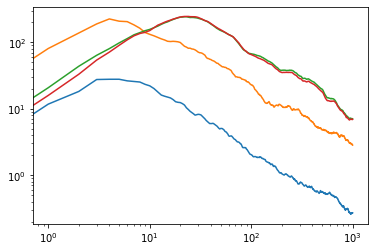

In [26]:
plt.loglog(varY.T)
plt.loglog(varZ.T)